In [6]:
# Ensemble Learning Assignment 


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.datasets import load_breast_cancer, load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# -----------------------------------------------
# SECTION 1: THEORETICAL QUESTIONS
# -----------------------------------------------
"""
1. Can we use Bagging for regression problems?
Yes, Bagging can be used for regression problems. In this case, base regressors (e.g., DecisionTreeRegressor) are used and the predictions are averaged.

2. What is the difference between multiple model training and single model training?
Single model uses one model for the entire dataset; multiple model training combines multiple models for better performance and lower variance.

3. Explain the concept of feature randomness in Random Forest.
Each tree is trained on a random subset of features, increasing diversity and preventing overfitting.

4. What is OOB (Out-of-Bag) Score?
It's a validation score using samples not included in the bootstrap sample — an internal validation method.

5. How can you measure the importance of features in a Random Forest model?
Feature importance is based on decrease in impurity or effect on prediction accuracy across trees.

6. Explain the working principle of a Bagging Classifier.
Multiple base models trained on bootstrapped datasets and predictions aggregated by majority voting.

7. How do you evaluate a Bagging Classifier’s performance?
Using accuracy, precision, recall, F1-score, and ROC-AUC.

8. How does a Bagging Regressor work?
It averages the predictions from all regressors trained on bootstrapped samples.

9. What is the main advantage of ensemble techniques?
Higher accuracy, lower overfitting, and more robust predictions.

10. What is the main challenge of ensemble methods?
Higher computational cost, complexity, and interpretability.

11. Explain the key idea behind ensemble techniques.
Combining weak learners to create a strong learner using diversity.

12. What is a Random Forest Classifier?
An ensemble of decision trees using bagging and feature randomness.

13. What are the main types of ensemble techniques?
Bagging, Boosting, Stacking.

14. What is ensemble learning in machine learning?
Combining multiple models to improve predictive performance.

15. When should we avoid using ensemble methods?
When you need simplicity, interpretability, or low computational overhead.

16. How does Bagging help in reducing overfitting?
By reducing model variance through averaging multiple diverse models.

17. Why is Random Forest better than a single Decision Tree?
Because it generalizes better and reduces overfitting.

18. What is the role of bootstrap sampling in Bagging?
It allows training multiple diverse models from random subsets of data.

19. What are some real-world applications of ensemble techniques?
Fraud detection, spam filtering, recommendation engines, credit scoring.

20. What is the difference between Bagging and Boosting?
Bagging trains models independently to reduce variance; Boosting trains sequentially to reduce bias.
"""


# -----------------------------------------------

# Dataset Preparation
X_class, y_class = load_breast_cancer(return_X_y=True)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

X_reg, y_reg = load_diabetes(return_X_y=True)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# 1. Bagging Classifier with Decision Tree
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag_clf.fit(X_train_c, y_train_c)
print("Bagging Classifier Accuracy:", accuracy_score(y_test_c, bag_clf.predict(X_test_c)))

# 2. Bagging Regressor with Decision Tree
bag_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bag_reg.fit(X_train_r, y_train_r)
print("Bagging Regressor MSE:", mean_squared_error(y_test_r, bag_reg.predict(X_test_r)))

# 3. Random Forest Classifier and Feature Importance
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
print(pd.Series(rf_clf.feature_importances_, index=load_breast_cancer().feature_names).sort_values(ascending=False))

# 4. Random Forest Regressor vs Decision Tree
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_r, y_train_r)
dt = DecisionTreeRegressor().fit(X_train_r, y_train_r)
print("RF MSE:", mean_squared_error(y_test_r, rf.predict(X_test_r)))
print("DT MSE:", mean_squared_error(y_test_r, dt.predict(X_test_r)))

# 5. OOB Score
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train_c, y_train_c)
print("OOB Score:", rf_oob.oob_score_)

# 6. Bagging with SVM
bag_svm = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42)
bag_svm.fit(X_train_c, y_train_c)
print("Bagging with SVM Accuracy:", accuracy_score(y_test_c, bag_svm.predict(X_test_c)))

# 7. RF Accuracy with different trees
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42).fit(X_train_c, y_train_c)
    print(f"{n} Trees Accuracy:", accuracy_score(y_test_c, rf.predict(X_test_c)))

# 8. Bagging with Logistic Regression
bag_lr = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
bag_lr.fit(X_train_c, y_train_c)
y_prob = bag_lr.predict_proba(X_test_c)[:, 1]
print("AUC Score:", roc_auc_score(y_test_c, y_prob))

# 9. RF Regressor Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_r, y_train_r)
print(pd.Series(rf.feature_importances_, index=load_diabetes().feature_names).sort_values(ascending=False))

# 10. Bagging vs RF Accuracy
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100).fit(X_train_c, y_train_c)
rf = RandomForestClassifier(n_estimators=100).fit(X_train_c, y_train_c)
print("Bagging Accuracy:", accuracy_score(y_test_c, bag.predict(X_test_c)))
print("RF Accuracy:", accuracy_score(y_test_c, rf.predict(X_test_c)))



Bagging Classifier Accuracy: 0.9590643274853801
Bagging Regressor MSE: 2908.80615037594
mean concave points        0.141934
worst concave points       0.127136
worst area                 0.118217
mean concavity             0.080557
worst radius               0.077975
worst perimeter            0.074292
mean perimeter             0.060092
mean area                  0.053810
worst concavity            0.041080
mean radius                0.032312
area error                 0.029538
worst texture              0.018786
worst compactness          0.017539
radius error               0.016435
worst symmetry             0.012929
perimeter error            0.011770
worst smoothness           0.011769
mean texture               0.011064
mean compactness           0.009216
fractal dimension error    0.007135
worst fractal dimension    0.006924
mean smoothness            0.006223
smoothness error           0.005881
concavity error            0.005816
compactness error          0.004596
symmetry err

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best CV Accuracy: 0.9496518987341773
Bagging Regressor (n=10) MSE: 3237.526541353384
Bagging Regressor (n=50) MSE: 2987.0073593984966
Bagging Regressor (n=100) MSE: 2908.80615037594
Misclassified samples: 5
Bagging Accuracy: 0.9590643274853801
Decision Tree Accuracy: 0.935672514619883


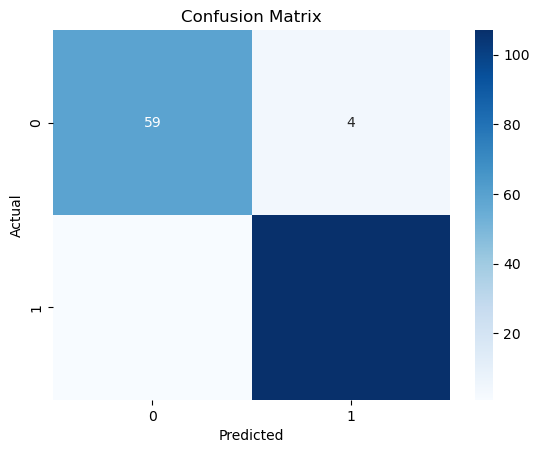

Stacking Accuracy: 0.9824561403508771
Top 5 Features:
 mean concave points     0.141934
worst concave points    0.127136
worst area              0.118217
mean concavity          0.080557
worst radius            0.077975
dtype: float64
Precision: 0.963302752293578
Recall: 0.9722222222222222
F1 Score: 0.9677419354838711
RF max_depth=3 Accuracy: 0.9707602339181286
RF max_depth=5 Accuracy: 0.9649122807017544
RF max_depth=10 Accuracy: 0.9707602339181286
RF max_depth=None Accuracy: 0.9707602339181286
Bagging with DecisionTreeRegressor MSE: 2987.0073593984966
Bagging with KNeighborsRegressor MSE: 3140.186131007519
ROC-AUC Score: 0.9968400940623163
CV Scores: [0.9122807  0.93859649 0.98245614 0.96491228 0.98230088]
Mean Accuracy: 0.9561092997981678


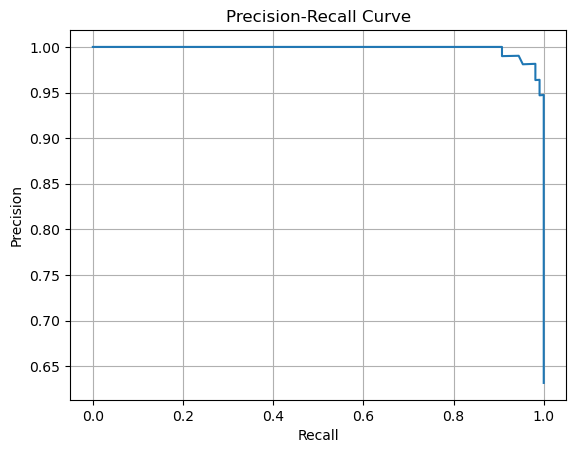

Stacking (RF + LR) Accuracy: 0.9766081871345029
Bagging Regressor (bootstrap=True) MSE: 2987.0073593984966
Bagging Regressor (bootstrap=False) MSE: 5190.679618045113


In [8]:
# 11. RF with GridSearchCV
param_grid = {'n_estimators': [50, 100], 'max_depth': [3, 5, None]}
gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
gs.fit(X_train_c, y_train_c)
print("Best Parameters:", gs.best_params_)
print("Best CV Accuracy:", gs.best_score_)

# 12. Bagging Regressor with different estimators
for n in [10, 50, 100]:
    model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(X_train_r, y_train_r)
    pred = model.predict(X_test_r)
    mse = mean_squared_error(y_test_r, pred)
    print(f"Bagging Regressor (n={n}) MSE:", mse)

# 13. RF and Misclassified Samples
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_c, y_train_c)
pred = rf.predict(X_test_c)
misclassified = X_test_c[y_test_c != pred]
print("Misclassified samples:", len(misclassified))

# 14. Bagging vs Decision Tree
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
dt = DecisionTreeClassifier()
bag.fit(X_train_c, y_train_c)
dt.fit(X_train_c, y_train_c)
print("Bagging Accuracy:", accuracy_score(y_test_c, bag.predict(X_test_c)))
print("Decision Tree Accuracy:", accuracy_score(y_test_c, dt.predict(X_test_c)))

# 15. RF Confusion Matrix
rf_cm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cm.fit(X_train_c, y_train_c)
pred_cm = rf_cm.predict(X_test_c)
cm = confusion_matrix(y_test_c, pred_cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 16. Stacking (DT, SVM, LR)
estimators = [('dt', DecisionTreeClassifier()), ('svm', SVC(probability=True)), ('lr', LogisticRegression(max_iter=1000))]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train_c, y_train_c)
print("Stacking Accuracy:", accuracy_score(y_test_c, stack.predict(X_test_c)))

# 17. RF Top 5 Important Features
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_c, y_train_c)
feat_imp = pd.Series(rf.feature_importances_, index=load_breast_cancer().feature_names)
print("Top 5 Features:\n", feat_imp.sort_values(ascending=False).head(5))

# 18. Bagging Evaluation - Precision, Recall, F1
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
bag.fit(X_train_c, y_train_c)
pred = bag.predict(X_test_c)
print("Precision:", precision_score(y_test_c, pred))
print("Recall:", recall_score(y_test_c, pred))
print("F1 Score:", f1_score(y_test_c, pred))

# 19. RF Accuracy for different max_depth
for d in [3, 5, 10, None]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=42)
    rf.fit(X_train_c, y_train_c)
    acc = accuracy_score(y_test_c, rf.predict(X_test_c))
    print(f"RF max_depth={d} Accuracy:", acc)

# 20. Bagging Regressor with DT & KNN
for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    bag = BaggingRegressor(base_estimator=base, n_estimators=50, random_state=42)
    bag.fit(X_train_r, y_train_r)
    pred = bag.predict(X_test_r)
    mse = mean_squared_error(y_test_r, pred)
    print(f"Bagging with {base.__class__.__name__} MSE:", mse)

# 21. RF ROC-AUC Score
rf_auc = RandomForestClassifier(n_estimators=100, random_state=42)
rf_auc.fit(X_train_c, y_train_c)
probs = rf_auc.predict_proba(X_test_c)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test_c, probs))

# 22. Bagging Classifier Cross-validation
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
cv_scores = cross_val_score(bag, X_class, y_class, cv=5)
print("CV Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# 23. RF Precision-Recall Curve
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_c, y_train_c)
probs = rf.predict_proba(X_test_c)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_c, probs)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

# 24. Stacking (RF + LR)
estimators2 = [('rf', RandomForestClassifier()), ('lr', LogisticRegression(max_iter=1000))]
stack2 = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression())
stack2.fit(X_train_c, y_train_c)
print("Stacking (RF + LR) Accuracy:", accuracy_score(y_test_c, stack2.predict(X_test_c)))

# 25. Bagging Regressor with bootstrap True/False
for b in [True, False]:
    bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=b, n_estimators=50, random_state=42)
    bag.fit(X_train_r, y_train_r)
    pred = bag.predict(X_test_r)
    mse = mean_squared_error(y_test_r, pred)
    print(f"Bagging Regressor (bootstrap={b}) MSE:", mse)
